In [44]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
plt.style.use("fivethirtyeight")

<ipython-input-44-77dda739d7ad>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [45]:
df= pd.read_csv(r"C:\Users\Thiyaneshwaran\Downloads\TITAN.NS.csv")
df.head()
df= df.loc[:,['Date','Close']]

In [7]:
df.head()

,Date,Close
0,2017-01-27,372.799988
1,2017-01-30,371.450012
2,2017-01-31,362.049988
3,2017-02-01,369.950012
4,2017-02-02,389.299988


In [8]:
#Simple Moving Average 
sma2 = df['Close'].rolling(2).mean()
df['2days-SMA'] = np.round(sma2,decimals=3)


In [51]:
df['Predicted_Close'] = df['Close']

In [11]:
df

,Date,Close,2days-SMA,Predicted_Close
0,2017-01-27,372.799988,NaN,372.799988
1,2017-01-30,371.450012,372.125,371.450012
2,2017-01-31,362.049988,366.750,362.049988
3,2017-02-01,369.950012,366.000,369.950012
4,2017-02-02,389.299988,379.625,389.299988
...,...,...,...,...
1230,2022-01-19,2588.899902,2594.750,2588.899902
1231,2022-01-20,2564.300049,2576.600,2564.300049
1232,2022-01-21,2528.149902,2546.225,2528.149902
1233,2022-01-24,2403.050049,2465.600,2403.050049


# Using SMA as Prediction using the Prediction Value only - Mape: 0.04429565812652553

predicted=2453.949951, expected=2523.850098
predicted=2471.216634, expected=2583.000000
predicted=2482.522162, expected=2576.149902
predicted=2469.229582, expected=2595.899902
predicted=2474.322793, expected=2572.699951
predicted=2475.358179, expected=2657.500000
predicted=2472.970185, expected=2653.350098
predicted=2474.217052, expected=2612.949951
predicted=2474.181805, expected=2619.250000
predicted=2473.789681, expected=2592.750000
predicted=2474.062846, expected=2597.550049
predicted=2474.011444, expected=2600.600098
predicted=2473.954657, expected=2588.899902
predicted=2474.009649, expected=2564.300049
predicted=2473.991917, expected=2528.149902
predicted=2473.985408, expected=2403.050049
predicted=2473.995658, expected=2376.500000


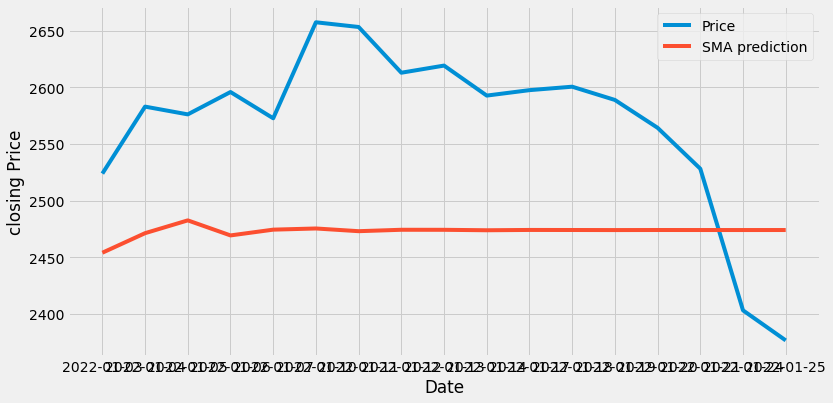

Mape: 0.04429565812652553


In [42]:



X= df['Predicted_Close'].values
size= np.sum(df['Date']<='2021-12-31')
train,test= X[0:size],X[size:len(X)]
rolling = 3
history = [x for x in train]
predictions=list()



for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length-rolling,length)])
    obs=test[t]
    predictions.append(yhat)
    history.append(yhat)
    print('predicted=%f, expected=%f' % (yhat, obs))

test = df.loc[df['Date'] > '2021-12-31']   
test = test.set_index('Date')
test['2SMA-Predictions'] = predictions


plt.figure(figsize=(12,6))
plt.plot(test['Close'],label='Price')
plt.plot(test['2SMA-Predictions'],label='SMA prediction')
plt.xlabel('Date')
plt.ylabel("closing Price")
plt.legend()
plt.show()
from sklearn.metrics import mean_absolute_percentage_error
MAPE=mean_absolute_percentage_error(test['Close'],predictions)
print("Mape:",MAPE)





# Using SMA as Prediction - using the obersved Value - 0.019174964403360837

predicted=2453.949951, expected=2523.850098
predicted=2494.516683, expected=2583.000000
predicted=2543.083333, expected=2576.149902
predicted=2561.000000, expected=2595.899902
predicted=2585.016601, expected=2572.699951
predicted=2581.583252, expected=2657.500000
predicted=2608.699951, expected=2653.350098
predicted=2627.850016, expected=2612.949951
predicted=2641.266683, expected=2619.250000
predicted=2628.516683, expected=2592.750000
predicted=2608.316650, expected=2597.550049
predicted=2603.183350, expected=2600.600098
predicted=2596.966716, expected=2588.899902
predicted=2595.683350, expected=2564.300049
predicted=2584.600016, expected=2528.149902
predicted=2560.449951, expected=2403.050049
predicted=2498.500000, expected=2376.500000


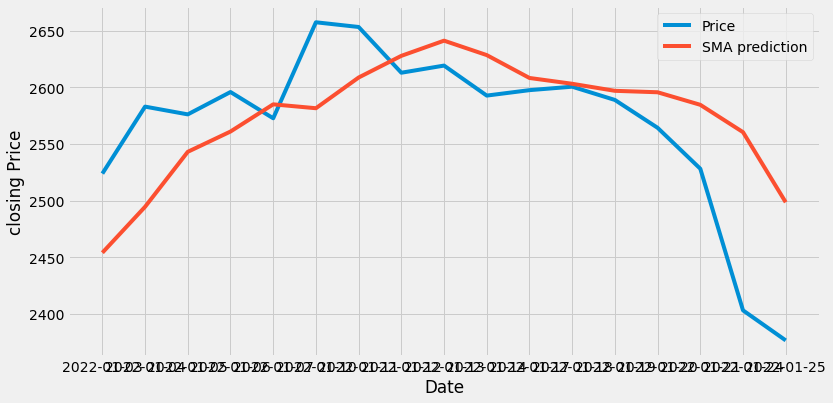

Mape: 0.019174964403360837


In [41]:



X= df['Predicted_Close'].values
size= np.sum(df['Date']<='2021-12-31')
train,test= X[0:size],X[size:len(X)]
rolling = 3
history = [x for x in train]
predictions=list()



for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length-rolling,length)])
    obs=test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

test = df.loc[df['Date'] > '2021-12-31']   
test = test.set_index('Date')
test['2SMA-Predictions_withOBS'] = predictions
#test.loc[:,'2SMA-Predictions_withOBS'] = predictions
plt.figure(figsize=(12,6))
plt.plot(test['Close'],label='Price')
plt.plot(test['2SMA-Predictions_withOBS'],label='SMA prediction')
plt.xlabel('Date')
plt.ylabel("closing Price")
plt.legend()
plt.show()
from sklearn.metrics import mean_absolute_percentage_error
MAPE=mean_absolute_percentage_error(test['Close'],predictions)
print("Mape:",MAPE)
#print(predictions)
#print(history)

In [40]:
test

,Close,Predicted_Close,2SMA-Predictions_withOBS
Date,,,
2022-01-03,2523.850098,2523.850098,2453.949951
2022-01-04,2583.000000,2583.000000,2494.516683
2022-01-05,2576.149902,2576.149902,2543.083333
2022-01-06,2595.899902,2595.899902,2561.000000
2022-01-07,2572.699951,2572.699951,2585.016601
2022-01-10,2657.500000,2657.500000,2581.583252
2022-01-11,2653.350098,2653.350098,2608.699951
2022-01-12,2612.949951,2612.949951,2627.850016
2022-01-13,2619.250000,2619.250000,2641.266683


In [13]:
sma2=df['Predicted_Close'].rolling(2).mean()
sma2

0               NaN
1        372.125000
2        366.750000
3        366.000000
4        379.625000
           ...     
1230    2594.750000
1231    2576.599976
1232    2546.224976
1233    2465.599976
1234    2389.775024
Name: Predicted_Close, Length: 1235, dtype: float64

In [19]:
[X[i] for i in range(3)]

[372.799988, 371.450012, 362.049988]

In [20]:
X

array([ 372.799988,  371.450012,  362.049988, ..., 2528.149902,
       2403.050049, 2376.5     ])

In [21]:
[X[i] for i in range(3,len(X))]

[369.950012,
 389.299988,
 379.75,
 391.049988,
 393.450012,
 425.600006,
 427.0,
 432.0,
 428.350006,
 428.350006,
 412.450012,
 424.0,
 431.5,
 434.450012,
 457.299988,
 440.0,
 432.950012,
 435.350006,
 437.200012,
 438.149994,
 430.450012,
 439.850006,
 438.049988,
 439.549988,
 440.950012,
 442.25,
 445.299988,
 462.200012,
 462.049988,
 465.799988,
 463.5,
 465.549988,
 463.700012,
 445.75,
 452.0,
 447.950012,
 447.950012,
 453.649994,
 455.0,
 457.299988,
 462.75,
 459.350006,
 491.75,
 487.399994,
 485.399994,
 485.75,
 486.75,
 479.799988,
 484.149994,
 481.25,
 471.200012,
 472.25,
 479.5,
 479.399994,
 482.350006,
 483.649994,
 479.799988,
 478.299988,
 470.25,
 485.100006,
 483.399994,
 492.649994,
 491.200012,
 484.549988,
 467.149994,
 482.399994,
 501.149994,
 495.0,
 483.649994,
 488.299988,
 481.75,
 471.649994,
 471.149994,
 481.399994,
 478.350006,
 469.200012,
 463.899994,
 473.450012,
 470.649994,
 469.799988,
 474.899994,
 470.700012,
 471.75,
 551.849976,
 527.1

In [ ]:
X.mean()

In [49]:
test.drop(columns='Predicted_Close',inplace=True)


In [50]:
test

,Close,2days-SMA,2SMA-Predictions
Date,,,
2022-01-03,2523.850098,2523.125,2453.949951
2022-01-04,2583.000000,2553.425,2471.216634
2022-01-05,2576.149902,2579.575,2482.522162
2022-01-06,2595.899902,2586.025,2469.229582
2022-01-07,2572.699951,2584.300,2474.322793
2022-01-10,2657.500000,2615.100,2475.358179
2022-01-11,2653.350098,2655.425,2472.970185
2022-01-12,2612.949951,2633.150,2474.217052
2022-01-13,2619.250000,2616.100,2474.181805


In [2]:
np.arange(1,4,1)

array([1, 2, 3])

In [3]:
df

,Date,Close
0,2017-01-27,372.799988
1,2017-01-30,371.450012
2,2017-01-31,362.049988
3,2017-02-01,369.950012
4,2017-02-02,389.299988
...,...,...
1230,2022-01-19,2588.899902
1231,2022-01-20,2564.300049
1232,2022-01-21,2528.149902
1233,2022-01-24,2403.050049


In [4]:
np.nan

nan

In [6]:
df1= [['2022-01-26',np.nan],['2022-01-27',np.nan],['2022-01-28',np.nan]]

In [9]:
df1=np.array(df1)

In [11]:
df1.shape

(3, 2)

In [12]:
df1[]

array([['2022-01-26', 'nan'],
       ['2022-01-27', 'nan'],
       ['2022-01-28', 'nan']], dtype='<U32')

In [52]:
df

,Date,Close,Predicted_Close
0,2017-01-27,372.799988,372.799988
1,2017-01-30,371.450012,371.450012
2,2017-01-31,362.049988,362.049988
3,2017-02-01,369.950012,369.950012
4,2017-02-02,389.299988,389.299988
...,...,...,...
1230,2022-01-19,2588.899902,2588.899902
1231,2022-01-20,2564.300049,2564.300049
1232,2022-01-21,2528.149902,2528.149902
1233,2022-01-24,2403.050049,2403.050049


In [53]:
 train = df.loc[df['Date']<='2021-12-31']

In [48]:
train

,Date,Close
0,2017-01-27,372.799988
1,2017-01-30,371.450012
2,2017-01-31,362.049988
3,2017-02-01,369.950012
4,2017-02-02,389.299988
...,...,...
1213,2021-12-27,2331.300049
1214,2021-12-28,2379.850098
1215,2021-12-29,2402.149902
1216,2021-12-30,2437.300049


In [54]:
 test = df.loc[df['Date']>'2021-12-31']

In [50]:
test

,Date,Close
1218,2022-01-03,2523.850098
1219,2022-01-04,2583.000000
1220,2022-01-05,2576.149902
1221,2022-01-06,2595.899902
1222,2022-01-07,2572.699951
1223,2022-01-10,2657.500000
1224,2022-01-11,2653.350098
1225,2022-01-12,2612.949951
1226,2022-01-13,2619.250000
1227,2022-01-14,2592.750000


predicted=2521.515108, expected=2523.850098
predicted=2523.363597, expected=2583.000000
predicted=2525.125173, expected=2576.149902
predicted=2526.889527, expected=2595.899902
predicted=2528.653792, expected=2572.699951
predicted=2530.418045, expected=2657.500000
predicted=2532.182315, expected=2653.350098
predicted=2533.946601, expected=2612.949951
predicted=2535.710917, expected=2619.250000
predicted=2537.475193, expected=2592.750000
predicted=2539.239474, expected=2597.550049
predicted=2541.003755, expected=2600.600098
predicted=2542.768034, expected=2588.899902
predicted=2544.532307, expected=2564.300049
predicted=2546.296599, expected=2528.149902
predicted=2548.060881, expected=2403.050049
predicted=2549.825116, expected=2376.500000


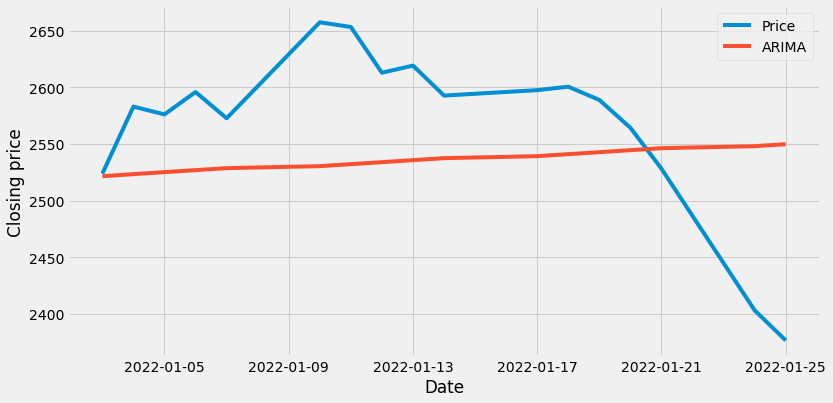

Mape: 0.027988664639772787


In [59]:
from statsmodels.tsa.arima_model import ARIMA

X = df['Close'].values
size = np.sum(df['Date']<='2021-12-31')
train, test = X[0:size],X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history,order=(1,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs=test[t]
    history.append(yhat)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
test = df.loc[df['Date'] > '2021-12-31']

test = test.set_index('Date')
test.index = pd.to_datetime(test.index)
test.loc[:,'ARIMA'] = predictions

plt.figure(figsize=(12,6))
plt.plot(test['Close'],label = 'Price')
plt.plot(test['ARIMA'],label = 'ARIMA')
plt.xlabel('Date')
plt.ylabel("Closing price")
plt.legend()
plt.show()
MAPE=mean_absolute_percentage_error(test['Close'],predictions)
print("Mape:",MAPE)


C:\Users\Thiyaneshwaran\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted=2521.515108, expected=2523.850098
predicted=2525.626179, expected=2583.000000
predicted=2583.003302, expected=2576.149902
predicted=2578.234015, expected=2595.899902
predicted=2597.141028, expected=2572.699951
predicted=2575.323945, expected=2657.500000
predicted=2656.397034, expected=2653.350098
predicted=2655.430928, expected=2612.949951
predicted=2616.291491, expected=2619.250000
predicted=2620.921608, expected=2592.750000
predicted=2595.583304, expected=2597.550049
predicted=2599.253483, expected=2600.600098
predicted=2602.368033, expected=2588.899902
predicted=2591.191340, expected=2564.300049
predicted=2567.023812, expected=2528.149902
predicted=2531.201121, expected=2403.050049
predicted=2408.200743, expected=2376.500000


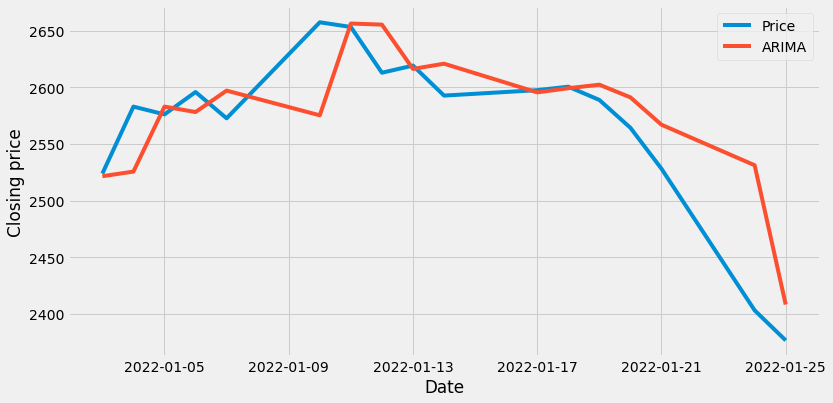

Mape: 0.011849107764639573


In [60]:
from statsmodels.tsa.arima_model import ARIMA

X = df['Close'].values
size = np.sum(df['Date']<='2021-12-31')
train, test = X[0:size],X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history,order=(1,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs=test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
test = df.loc[df['Date'] > '2021-12-31']

test = test.set_index('Date')
test.index = pd.to_datetime(test.index)
test.loc[:,'ARIMA'] = predictions

plt.figure(figsize=(12,6))
plt.plot(test['Close'],label = 'Price')
plt.plot(test['ARIMA'],label = 'ARIMA')
plt.xlabel('Date')
plt.ylabel("Closing price")
plt.legend()
plt.show()
MAPE=mean_absolute_percentage_error(test['Close'],predictions)
print("Mape:",MAPE)